### Mini-batch Gradient Descent
It is a variant of Gradient Descent, which is an iterative optimization algorithm used to find the minimum of a cost function in machine learning problems. Unlike Batch Gradient Descent that processes the entire training set at once, mini-batch Gradient Descent processes small random subsets of the training data (mini-batches) at each iteration.

In [1]:
import numpy as np
np.random.seed(42)

m = 100 # number of instances
X = 2 * np.random.rand(m,1) # column-vector
y = 4 + 3*X + np.random.rand(m,1) # column-vector

batch_size = 20

In [2]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add X0=1 to each instance

In [3]:
n_epochs = 100
t0, t1 = 5, 50 # learning schedule hyperperameters

In [4]:
def learning_schedule(t):
    return t0/(t+t1)

In [5]:
theta = np.random.rand(2,1)
theta

array([[0.64203165],
       [0.08413996]])

In [6]:
epoch_list = []
cost_list = []

In [7]:
for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        
        xi = X_b[random_index: batch_size+1]
        yi = y[random_index: batch_size+1]
        gradients = 2 * xi.T @ (xi @ theta - yi) 
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

    y_predicted = X_b @ theta
    cost = np.mean(np.square(y - y_predicted))
    
    if epoch % 10 == 0:
        epoch_list.append(epoch)
        cost_list.append(cost)

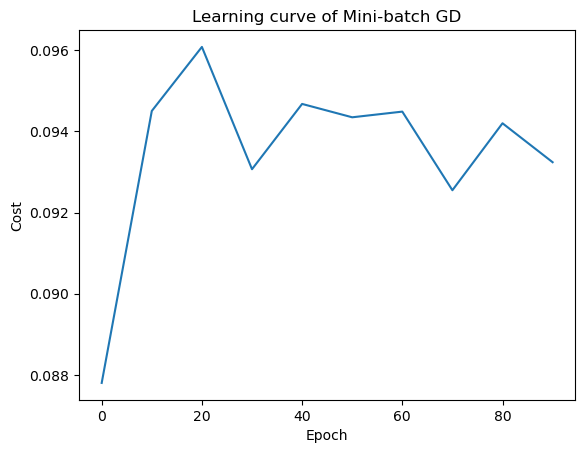

In [8]:
import matplotlib.pyplot as plt
plt.title("Learning curve of Mini-batch GD")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_list)
plt.show()

In [9]:
theta

array([[4.66700875],
       [2.92078754]])

However, mini-batch Gradient Descent can be more sensitive to the learning rate and the choice of mini-batch size, which can affect the stability and convergence of the algorithm. A learning rate that is too high can cause the algorithm to diverge, while a learning rate that is too low can slow down the convergence of the algorithm. Similarly, a mini-batch size that is too small can introduce noise into the gradient, while a mini-batch size that is too large can increase the computational cost and reduce the effectiveness of the algorithm.